# **Training the Final Model with Multi-Class Transfer Learning Using The Inception V3**

# **Status: SUCCESS**

References:

[YouTube]('https://www.youtube.com/watch?v=LsdxvjLWkIY&ab_channel=codebasics')

[GitHub]('https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/18_transfer_learning/cnn_transfer_learning.ipynb')

Note:
This is a cleaned version of the previous test [(link on GitHub)]('https://github.com/AriesAnon/i-SenseCNN/blob/main/Multiclass_Test.ipynb')

# **Conclusion: Transfer Learning Success**

***With a large dataset such as what was used here, consider using a machine with a high RAM. The splitting of dataset takes a lot of RAM. Consider finding ways in decreasing this RAM usage as well if a good machine is not available. Overfitting might currently be a problem. Consider this when creating the confusion matrix.***

For reference, here are the list of the labels initialized previously for the model:

```
meat_labels_dict = {
    'beef_cubes': 0,
    'beef_sirloin': 1,
    'beef_ribs': 2,
    'beef_shank': 3,

    'pork_kasim': 4,
    'pork_chop': 5,
    'pork_pata': 6,
    'pork_pigue': 7,

    'chicken_drumstick': 8,
    'chicken_wings': 9,
    'chicken_quarter_cut': 10,
    'chicken_breast': 11,
    'chicken_thigh': 12,
    
}
```


# **This is a test to partially train the final model**
**Todo:**
*   Be able to train the model using two classes and save it
*   Be able to load the saved model and train the additional class while retaining the data from the two classes it was previously trained on. 
*   Test the accuracy using this method

In [2]:
pip install opencv-python-headless

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install tensorflow

In [6]:
pip install --upgrade tensorflow-hub

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import cv2

import PIL.Image as Image
import os
import shutil
from os import getcwd
import pathlib

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [7]:
cur_dir = os.getcwd()
cur_dir

'C:\\Users\\CCSE\\i-SENSE'

In [9]:
path_dataset = os.path.join(cur_dir, 'ResizedDataset.zip')
path_dataset

'C:\\Users\\CCSE\\i-SENSE\\ResizedDataset.zip'

# **Importing the Dataset**

In [10]:
#UnZipping the File
from zipfile import ZipFile
file_name = path_dataset

with ZipFile(file_name,'r') as zip:
  zip.extractall(cur_dir)  # added a path to extract all of the files in the dataset zip
  print('Done')

Done


In [12]:
join_path = os.path.join(cur_dir, 'ResizedDataset')
data_dir = pathlib.Path(join_path)
data_dir

WindowsPath('C:/Users/CCSE/i-SENSE/ResizedDataset')

In [13]:
list(data_dir.glob('*/*'))[:5]

[WindowsPath('C:/Users/CCSE/i-SENSE/ResizedDataset/beef_cubes/DSC_0002 (2).jpeg'),
 WindowsPath('C:/Users/CCSE/i-SENSE/ResizedDataset/beef_cubes/DSC_0002.jpeg'),
 WindowsPath('C:/Users/CCSE/i-SENSE/ResizedDataset/beef_cubes/DSC_0003 (2).jpeg'),
 WindowsPath('C:/Users/CCSE/i-SENSE/ResizedDataset/beef_cubes/DSC_0003.jpeg'),
 WindowsPath('C:/Users/CCSE/i-SENSE/ResizedDataset/beef_cubes/DSC_0004 (2).jpeg')]

In [14]:
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

12370


In [15]:
meat_images_dict = {
    'beef_cubes': list(data_dir.glob('beef_cubes/*')),
    'beef_sirloin': list(data_dir.glob('beef_sirloin/*')),
    'beef_ribs': list(data_dir.glob('beef_ribs/*')),
    'beef_shank': list(data_dir.glob('beef_shank/*')),

    'pork_kasim': list(data_dir.glob('pork_kasim/*')),
    'pork_chop': list(data_dir.glob('pork_chop/*')),
    'pork_pata': list(data_dir.glob('pork_pata/*')),
    'pork_pigue': list(data_dir.glob('pork_pigue/*')),

    'chicken_drumstick': list(data_dir.glob('chicken_drumstick/*')),
    'chicken_wings': list(data_dir.glob('chicken_wings/*')),
    'chicken_quarter_cut': list(data_dir.glob('chicken_quarter_cut/*')),
    'chicken_breast': list(data_dir.glob('chicken_breast/*')),
    'chicken_thigh': list(data_dir.glob('chicken_thigh/*')),

}

In [16]:
meat_labels_dict = {
    'beef_cubes': 0,
    'beef_sirloin': 1,
    'beef_ribs': 2,
    'beef_shank': 3,

    'pork_kasim': 4,
    'pork_chop': 5,
    'pork_pata': 6,
    'pork_pigue': 7,

    'chicken_drumstick': 8,
    'chicken_wings': 9,
    'chicken_quarter_cut': 10,
    'chicken_breast': 11,
    'chicken_thigh': 12,
    
}

In [17]:
img = cv2.imread(str(meat_images_dict['beef_cubes'][0]))

In [18]:
img.shape

(299, 299, 3)

In [19]:
X, y = [], []

for meat_name, images in meat_images_dict.items():
    for image in images:
        print(image) #for checking for broken images; NOTE: delete broken images in the dataset
        img = cv2.imread(str(image))
        X.append(img)
        y.append(meat_labels_dict[meat_name])

C:\Users\CCSE\i-SENSE\ResizedDataset\beef_cubes\DSC_0002 (2).jpeg
C:\Users\CCSE\i-SENSE\ResizedDataset\beef_cubes\DSC_0002.jpeg
C:\Users\CCSE\i-SENSE\ResizedDataset\beef_cubes\DSC_0003 (2).jpeg
C:\Users\CCSE\i-SENSE\ResizedDataset\beef_cubes\DSC_0003.jpeg
C:\Users\CCSE\i-SENSE\ResizedDataset\beef_cubes\DSC_0004 (2).jpeg
C:\Users\CCSE\i-SENSE\ResizedDataset\beef_cubes\DSC_0004.jpeg
C:\Users\CCSE\i-SENSE\ResizedDataset\beef_cubes\DSC_0005 (2).jpeg
C:\Users\CCSE\i-SENSE\ResizedDataset\beef_cubes\DSC_0005.jpeg
C:\Users\CCSE\i-SENSE\ResizedDataset\beef_cubes\DSC_0006 (2).jpeg
C:\Users\CCSE\i-SENSE\ResizedDataset\beef_cubes\DSC_0006.jpeg
C:\Users\CCSE\i-SENSE\ResizedDataset\beef_cubes\DSC_0007 (2).jpeg
C:\Users\CCSE\i-SENSE\ResizedDataset\beef_cubes\DSC_0007.jpeg
C:\Users\CCSE\i-SENSE\ResizedDataset\beef_cubes\DSC_0008 (2).jpeg
C:\Users\CCSE\i-SENSE\ResizedDataset\beef_cubes\DSC_0008.jpeg
C:\Users\CCSE\i-SENSE\ResizedDataset\beef_cubes\DSC_0009 (2).jpeg
C:\Users\CCSE\i-SENSE\ResizedDataset\b

# **Reducing RAM usage by saving the resized image into Google Drive**

**Theory:** 

***Theory result:***

Loop through the images, resize them, then save them to Google Drive. This might save RAM. We can also assume that we can do this on a separate notebook to reduce more RAM. We only append the saved resized images into the array in this notebook.

The 12 gb RAM was not enough since the 12370 images was resized, then saved into an array, which will then be once again divided and saved into another array. I believe this eats RAM. By saving the resized image separately, we would be able to not only skip the first step, but save time as well.

# **If there is an error (~215: Assertion Failed) during the resizing of images, add the following code:**
Use this code to see the image name and path of the image that is causing problem.
`
print(image) #for checking for broken images; NOTE: delete broken images in the dataset
`

To delete broken images, use the following code instead of deleting it directly from the Files Navigation Menu. `
os.remove('image_path')
`

In [20]:
X = np.array(X)
y = np.array(y)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [22]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

# **Training the new model**

In [23]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(299, 299, 3), trainable=False)

In [24]:
num_of_meat = 13

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_meat)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              21802784  
                                                                 
 dense (Dense)               (None, 13)                26637     
                                                                 
Total params: 21,829,421
Trainable params: 26,637
Non-trainable params: 21,802,784
_________________________________________________________________


In [25]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
290/290 [==============================] - 196s 664ms/step - loss: 0.4695 - acc: 0.8962
Epoch 2/10
290/290 [==============================] - 196s 676ms/step - loss: 0.0972 - acc: 0.9845
Epoch 3/10
290/290 [==============================] - 198s 684ms/step - loss: 0.0556 - acc: 0.9905
Epoch 4/10
290/290 [==============================] - 197s 679ms/step - loss: 0.0387 - acc: 0.9951
Epoch 5/10
290/290 [==============================] - 197s 680ms/step - loss: 0.0274 - acc: 0.9973
Epoch 6/10
290/290 [==============================] - 196s 676ms/step - loss: 0.0205 - acc: 0.9985
Epoch 7/10
290/290 [==============================] - 195s 672ms/step - loss: 0.0159 - acc: 0.9989
Epoch 8/10
290/290 [==============================] - 195s 672ms/step - loss: 0.0134 - acc: 0.9994
Epoch 9/10
290/290 [==============================] - 201s 693ms/step - loss: 0.0107 - acc: 0.9995
Epoch 10/10
290/290 [==============================] - 207s 713ms/step - loss: 0.0091 - acc: 0.9997


In [26]:
model.evaluate(X_test_scaled,y_test)

97/97 [==============================] - 69s 704ms/step - loss: 0.0239 - acc: 0.9939


[0.023922769352793694, 0.9938570857048035]

In [27]:
!mkdir -p saved_model
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model\assets


INFO:tensorflow:Assets written to: saved_model/my_model\assets


# **Saving model as tflite**

In [42]:
saved_model_path = os.path.join(cur_dir, 'saved_model/my_model')
saved_model_path

'C:\\Users\\CCSE\\i-SENSE\\saved_model/my_model'

In [43]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

# **Testing the model with a foreign image**

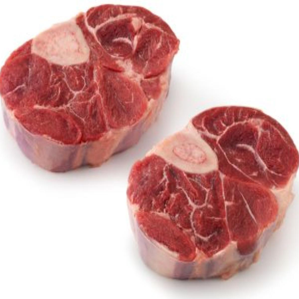

In [39]:
test_folder = os.path.join(cur_dir, 'test_images')
test_folder
IMAGE_SHAPE = (299, 299)
image_test = Image.open(os.path.join(test_folder, 'beef_shank.jpeg')).resize(IMAGE_SHAPE)
image_test

In [40]:
image_test = np.array(image_test)/255.0
image_test.shape

(299, 299, 3)

In [41]:
predicted = model.predict(image_test[np.newaxis, ...])
predicted = np.argmax(predicted, axis=1)
predicted

array([3], dtype=int64)

# **Conclusion: Transfer Learning Success**

***With a large dataset such as what was used here, consider using a machine with a high RAM. The splitting of dataset takes a lot of RAM. Consider finding ways in decreasing this RAM usage as well if a good machine is not available. Overfitting might currently be a problem. Consider this when creating the confusion matrix.***

For reference, here are the list of the labels initialized previously for the model:

```
meat_labels_dict = {
    'beef_cubes': 0,
    'beef_sirloin': 1,
    'beef_ribs': 2,
    'beef_shank': 3,

    'pork_kasim': 4,
    'pork_chop': 5,
    'pork_pata': 6,
    'pork_pigue': 7,

    'chicken_drumstick': 8,
    'chicken_wings': 9,
    'chicken_quarter_cut': 10,
    'chicken_breast': 11,
    'chicken_thigh': 12,
    
}
```
